In [ ]:
# file_path = '/content/drive/My Drive/Datasets/credit_card_dataset.csv'

In [ ]:
import pandas as pd

# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Specify the file path within your Google Drive
file_path = '/content/drive/My Drive/credit_card_dataset.csv'

# Read the dataset
data = pd.read_csv('./credit_card_dataset.csv')


Number of NaN values in X_train_scaled: 0
Number of NaN values in X_test_scaled: 0
Logistic Regression
AUPRC: 0.7559867636143603
Confusion Matrix:
[[56855     9]
 [   41    57]]

Random Forest
AUPRC: 0.872754224511982
Confusion Matrix:
[[56862     2]
 [   21    77]]

Gradient Boosting
AUPRC: 0.6366963098614076
Confusion Matrix:
[[56843    21]
 [   39    59]]

Support Vector Machine
AUPRC: 0.852520476761438
Confusion Matrix:
[[56862     2]
 [   37    61]]

Neural Network
AUPRC: 0.8585830126538999
Confusion Matrix:
[[56855     9]
 [   20    78]]



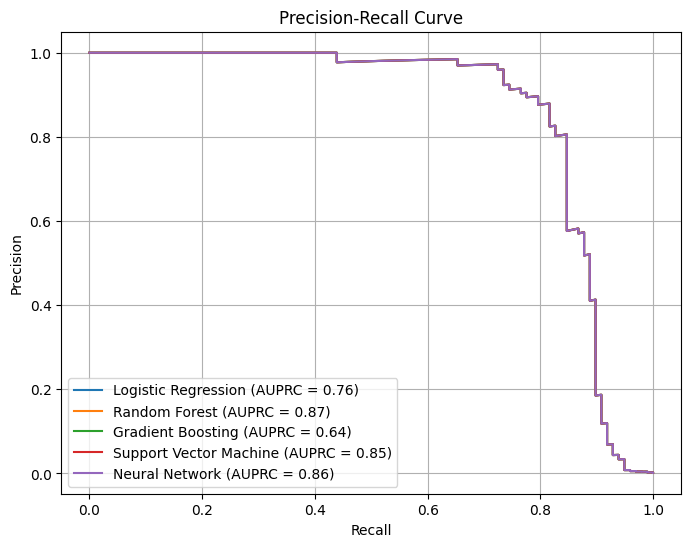

Model Accuracies:
Logistic Regression: 0.9991
Random Forest: 0.9996
Gradient Boosting: 0.9989
Support Vector Machine: 0.9993
Neural Network: 0.9995


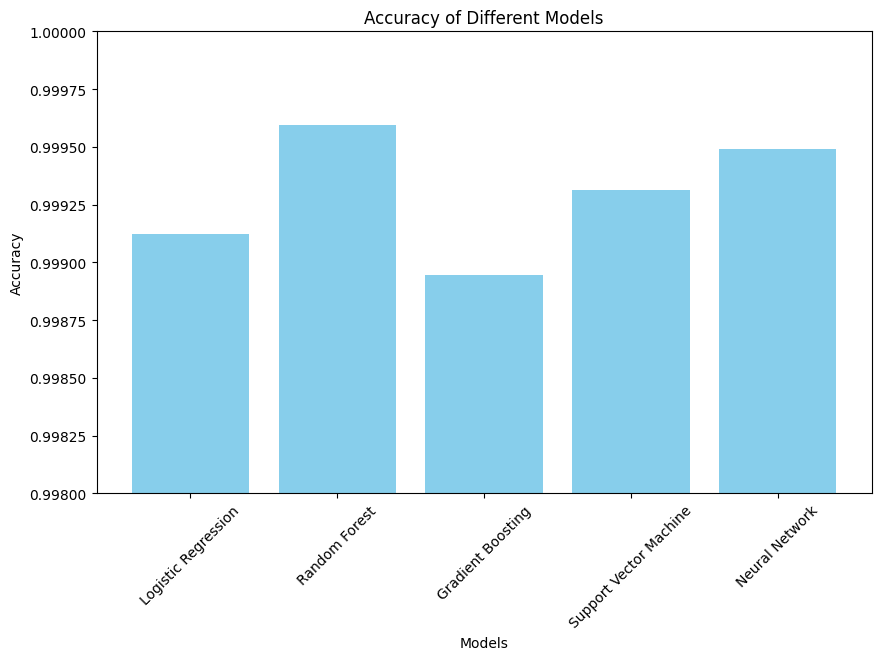

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.impute import SimpleImputer

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
y_train_imputed = y_train.fillna(y_train.mean())
print("Number of NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Number of NaN values in X_test_scaled:", np.isnan(X_test_scaled).sum())
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier()
}
# Convert continuous labels to binary labels
threshold = 0.5  # Set a threshold to determine fraud (1) and non-fraud (0)
y_train_binary = (y_train_imputed > threshold).astype(int)

# Model training and evaluation
results = {}
for name, model in models.items():
    # Fit the model to the training data with binary labels
    model.fit(X_train_scaled, y_train_binary)

    if isinstance(model, SVC) and not model.probability:
        # Use decision_function instead
        y_pred_scores = model.decision_function(X_test_scaled)
        y_pred_proba = (y_pred_scores - y_pred_scores.min()) / (y_pred_scores.max() - y_pred_scores.min())  # Normalize scores
    else:
        # Use predict_proba for other models
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    results[name] = {'confusion_matrix': cm, 'precision_recall_auc': pr_auc}
for name, result in results.items():
    print(name)
    print("AUPRC:", result['precision_recall_auc'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print()
plt.figure(figsize=(8, 6))

for name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f"{name} (AUPRC = {result['precision_recall_auc']:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import accuracy_score

accuracies = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

print("Model Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")
import matplotlib.pyplot as plt

# Extract model names and accuracy scores
model_names = list(accuracies.keys())
accuracy_scores = list(accuracies.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.998, 1)  # Set y-axis limits to better visualize differences
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE  # Import SMOTE
from sklearn.metrics import accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Assume 'data' is your DataFrame containing features and target variable
# Replace this with your actual data loading step
# data = pd.read_csv('your_data.csv')

# Feature scaling
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Splitting data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE to balance the class distribution in training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Instantiate and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)

# Evaluate LR model's performance
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_lr = lr_model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

print("Logistic Regression AUPRC:", pr_auc_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)

# Evaluate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression AUPRC: 0.5192817516210344
Logistic Regression Confusion Matrix:
[[47 50]
 [60 43]]
Logistic Regression Accuracy: 0.45


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE  # Import SMOTE
from sklearn.metrics import accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Assume 'data' is your DataFrame containing features and target variable
# Replace this with your actual data loading step
# data = pd.read_csv('your_data.csv')

# Feature scaling
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Splitting data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE to balance the class distribution in training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Instantiate and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)

# Evaluate LR model's performance
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_lr = lr_model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

print("Logistic Regression AUPRC:", pr_auc_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)

# Evaluate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression AUPRC: 0.7741040677369085
Logistic Regression Confusion Matrix:
[[55425  1439]
 [    8    90]]
Logistic Regression Accuracy: 0.9745970998209332


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, accuracy_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Assume 'data' is your DataFrame containing features and target variable
# Replace this with your actual data loading step
# data = pd.read_csv('your_data.csv')

# Feature scaling
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Splitting data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE to balance the class distribution in training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Instantiate and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)

# Evaluate LR model's performance
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_lr = lr_model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_lr)
pr_auc_lr = auc(recall, precision)

print("Logistic Regression AUPRC:", pr_auc_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression F1-score:", f1_lr)

# Evaluate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression AUPRC: 0.7741040677369085
Logistic Regression Confusion Matrix:
[[55425  1439]
 [    8    90]]
Logistic Regression Precision: 0.058862001308044476
Logistic Regression F1-score: 0.11063306699446836
Logistic Regression Accuracy: 0.9745970998209332


Logistic Regression AUPRC: 0.7741040677369085
Logistic Regression Confusion Matrix:
[[55425  1439]
 [    8    90]]
Logistic Regression Precision: 0.058862001308044476
Logistic Regression F1-score: 0.11063306699446836
Logistic Regression Accuracy: 0.9745970998209332


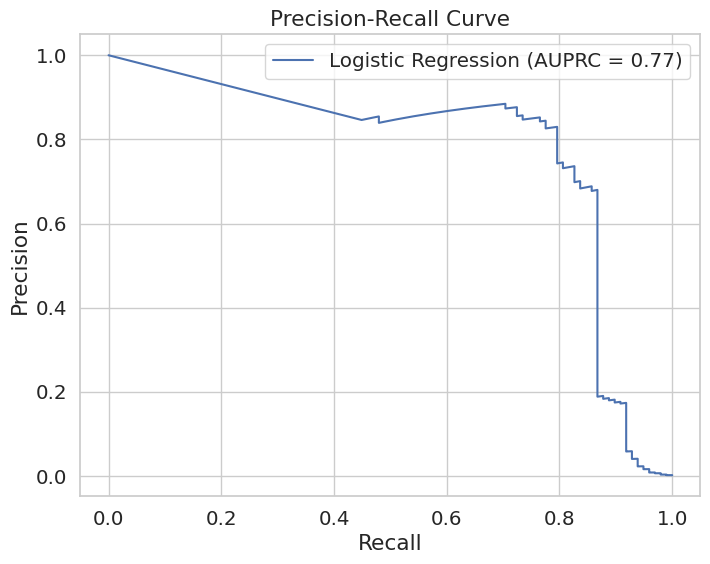

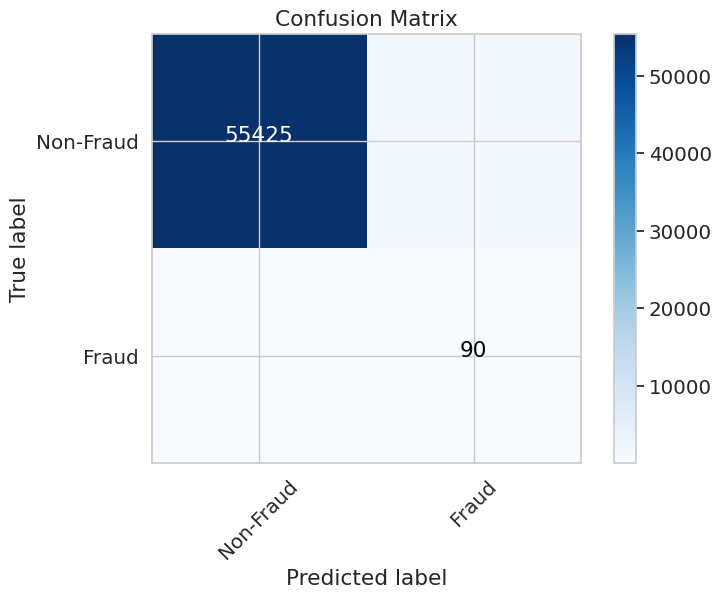

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, accuracy_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load data
# Assuming 'data' is your DataFrame containing features and target variable
# Replace this with your actual data loading step
# data = pd.read_csv('your_data.csv')

# Feature scaling
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Split data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE to balance the class distribution in training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Instantiate and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)

# Evaluate LR model's performance
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_lr = lr_model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_lr)
pr_auc_lr = auc(recall, precision)

print("Logistic Regression AUPRC:", pr_auc_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression F1-score:", f1_lr)

# Evaluate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Logistic Regression (AUPRC = %0.2f)' % pr_auc_lr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_lr, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Fraud', 'Fraud'], rotation=45)
plt.yticks(tick_marks, ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i, j in zip(range(2), range(2)):
    plt.text(j, i, format(cm_lr[i, j], 'd'), horizontalalignment="center", color="white" if cm_lr[i, j] > cm_lr.max() / 2 else "black")
plt.show()